In [1]:
%pip install pandas
%pip install matplotlib seaborn scikit-learn
%pip install xgboost
%pip install scikeras

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import Keras?Classifier
from tensorflow.keras import layers, models



In [3]:
# Load the data
df = pd.read_csv('train.csv')
df = df.dropna()  # Drop any rows with NaN values

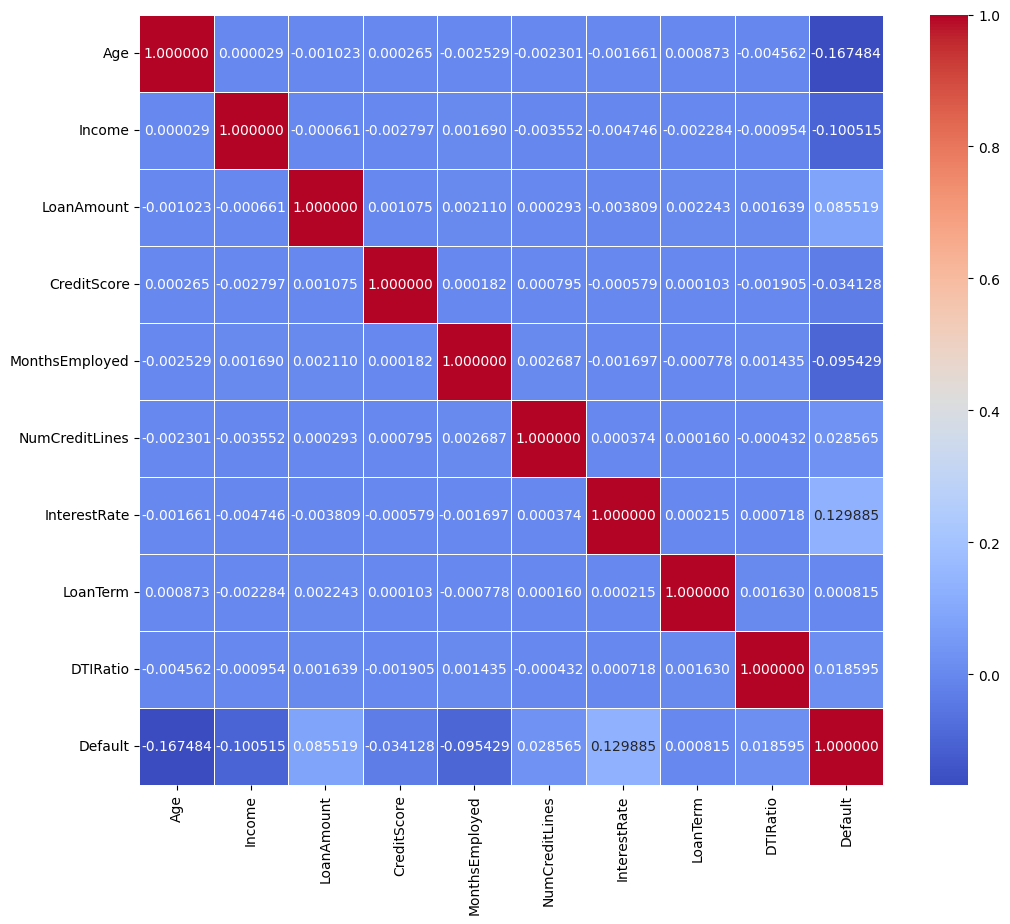

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.000029   -0.001023     0.000265       -0.002529   
Income          0.000029  1.000000   -0.000661    -0.002797        0.001690   
LoanAmount     -0.001023 -0.000661    1.000000     0.001075        0.002110   
CreditScore     0.000265 -0.002797    0.001075     1.000000        0.000182   
MonthsEmployed -0.002529  0.001690    0.002110     0.000182        1.000000   
NumCreditLines -0.002301 -0.003552    0.000293     0.000795        0.002687   
InterestRate   -0.001661 -0.004746   -0.003809    -0.000579       -0.001697   
LoanTerm        0.000873 -0.002284    0.002243     0.000103       -0.000778   
DTIRatio       -0.004562 -0.000954    0.001639    -0.001905        0.001435   
Default        -0.167484 -0.100515    0.085519    -0.034128       -0.095429   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.002301     -0.001661  0.00087

In [4]:

df_numeric = df.select_dtypes(include=['float64', 'int64'])


corr = df_numeric.corr()  # Calculate the correlation matrix for the scaled features and target variable.


plt.figure(figsize=(12, 10))  # Set the figure size for better readability of the heatmap.
sns.heatmap(corr, annot=True, fmt=".6f", cmap='coolwarm', linewidths=0.5)  # Generate the heatmap with the correlation matrix.
plt.show()  # Display the heatmap.

print(corr)


#-----------------------------------------------------------------------------------------
# columns_to_drop = ['MonthsEmployed']#, 'NumCreditLines']  # Example columns that might have high correlation with others.
# df_scaled = df_scaled.drop(columns=[col for col in columns_to_drop if col in df_scaled.columns])  # Drop the selected columns.
#did not drop any columns cause they gave worse results
#------------------------------------------------------------------------------------------------------


print(df_numeric.describe())

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import joblib

# Load and prepare data (replace 'train.csv' and 'test.csv' with your file paths)
df_train = pd.read_csv('train.csv')
df_train = df_train.dropna()
X = df_train.select_dtypes(include=['float64', 'int64']).drop('Default', axis=1)
y = df_train['Default']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Save the model using joblib
joblib.dump(best_model, 'logreg_model.joblib')

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation data: {val_accuracy:.4f}")

# Load test data
test_df = pd.read_csv('test.csv')
test_df = test_df.dropna()
X_test = test_df.select_dtypes(include=['float64', 'int64'])

# Feature scaling for test data
X_test_scaled = scaler.transform(X_test)

# Load the saved model
loaded_model = joblib.load('logreg_model.joblib')

# Make predictions on the test data
y_test_pred = loaded_model.predict(X_test_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],  # Adjust 'LoanID' column name as per your dataset
    'Default': y_test_pred
})

# Save the predictions to a CSV file
submission_df.to_csv('sublr.csv', index=False)
print("Submission file saved as 'sublr.csv'")

Accuracy on validation data: 0.8840
Submission file saved as 'sublr.csv'
